In [ ]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow.keras import layers, callbacks


In [ ]:
#Loading dataset
redwine = pd.read_csv('/content/red-wine.csv')

In [ ]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#checking if there any null values
redwine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
redwine.shape

(1599, 12)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#defining features
target = "quality"
assert target in redwine.columns
X = redwine.drop(target, axis=1)
y = redwine[target]

In [ ]:
train_size, test_size, valid_size = (0.7,0.3,0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2025)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=2025)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
X_valid_s = scaler.transform(X_valid)

In [ ]:
#LinearRegression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train_s, y_train)
pred_lin = lr.predict(X_valid_s)
mae_lin  = mean_absolute_error(y_valid, pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_valid, pred_lin))
r2_lin   = r2_score(y_valid, pred_lin)

print(f"MAE: {mae_lin}")
print(f"RMSE: {rmse_lin}")
print(f"R2 Score: {r2_lin}")

MAE: 0.49685915799012
RMSE: 0.6360057627454103
R2 Score: 0.394756825910759


In [ ]:
#Deep Learning
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam, RMSprop

In [ ]:
def basic_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="relu", input_shape=(x_size,)))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07, weight_decay=0.0),
        metrics=[metrics.mae])
    return(t_model)

In [ ]:
def basic_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="relu", input_shape=(x_size,)))
    t_model.add(Dense(100, activation="relu", input_shape=(x_size,)))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07, weight_decay=0.0),
        metrics=[metrics.mae])
    return(t_model)

In [ ]:
early_stop = callbacks.EarlyStopping(monitor="val_loss", patience=15, min_delta=1e-4, mode="min",restore_best_weights=True)

In [ ]:
# Deep Learning Model instantiation and training
t_model = basic_model_1(X_train_s.shape[1], 1)

history = t_model.fit(
    X_train_s, y_train,
    validation_data=(X_valid_s, y_valid),
    epochs=300, batch_size=32,
    callbacks=[early_stop],  # EarlyStopping is essential
    verbose=1
)

Epoch 1/300


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 20.5837 - mean_absolute_error: 4.2783 - val_loss: 4.6651 - val_mean_absolute_error: 1.8559
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6451 - mean_absolute_error: 1.5842 - val_loss: 2.3977 - val_mean_absolute_error: 1.2424
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2409 - mean_absolute_error: 1.2073 - val_loss: 1.8215 - val_mean_absolute_error: 1.0681
Epoch 4/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7698 - mean_absolute_error: 1.0321 - val_loss: 1.5365 - val_mean_absolute_error: 0.9679
Epoch 5/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5297 - mean_absolute_error: 0.9877 - val_loss: 1.3790 - val_mean_absolute_error: 0.9202
Epoch 6/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2758 - mean_absolute_error: 0.8768 - val_loss: 1.2458 - val_mean_absolute_error: 0.8516
Epoch 7/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1292 - mean_absolute_error: 0.8158 - val_loss: 1.0234 -

In [ ]:
history = t_model.fit(
    X_train_s, y_train,
    validation_data=(X_valid_s, y_valid),
    epochs=300, batch_size=32,
    callbacks=[early_stop],  # EarlyStopping is essential
    verbose=1)

Epoch 1/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3057 - mean_absolute_error: 0.4423 - val_loss: 0.5304 - val_mean_absolute_error: 0.5472
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3103 - mean_absolute_error: 0.4408 - val_loss: 0.5110 - val_mean_absolute_error: 0.5454
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2813 - mean_absolute_error: 0.4208 - val_loss: 0.4503 - val_mean_absolute_error: 0.5011
Epoch 4/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2736 - mean_absolute_error: 0.4062 - val_loss: 0.6439 - val_mean_absolute_error: 0.6407
Epoch 5/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3085 - mean_absolute_error: 0.4354 - val_loss: 0.5397 - val_mean_absolute_error: 0.5619
Epoch 6/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3253 - mean_absolute_error: 0.4599 - val_loss: 0.4600 - val_mean_absolute_error: 0.5096
Epoch 7/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2858 - mean_absolute_error: 0.4293 - val_loss

In [ ]:
pred = t_model.predict(X_test_s).ravel()
mae  = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2   = r2_score(y_test, pred)
print(f"Test MAE:  {mae:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R^2:  {r2:.3f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test MAE:  0.504
Test RMSE: 0.673
Test R^2:  0.240


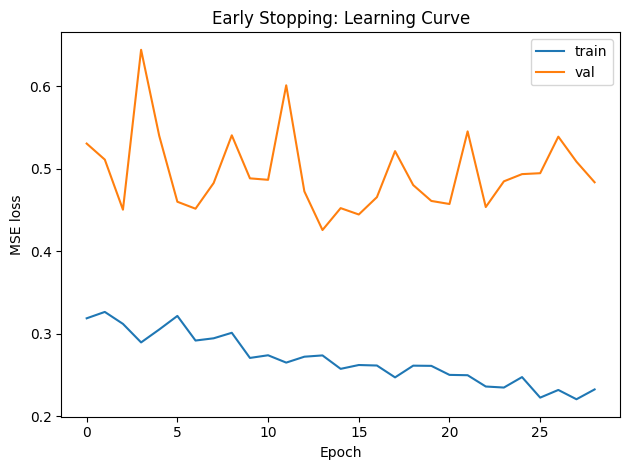

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("Epoch"); plt.ylabel("MSE loss"); plt.title("Early Stopping: Learning Curve")
plt.legend(); plt.tight_layout(); plt.show()